In [4]:
import relaqs.api.gates as gates
import numpy as np
import pandas as pd
import os
from datetime import datetime
from qutip.superoperator import liouvillian, spre, spost
from qutip import Qobj, tensor, Bloch
from qutip.operators import *
import matplotlib.pyplot as plt
from relaqs.api.utils import *
from scipy.linalg import expm

In [5]:
I = gates.I().get_matrix()
X = gates.X().get_matrix()
Y = gates.Y().get_matrix()
Z = gates.Z().get_matrix()

In [6]:
steps_per_Haar = 2
final_time = 35.5556E-9 #in seconds
gamma_phase_max = 1.1675 * np.pi
gamma_magnitude_max = 1.8 * np.pi / final_time / steps_per_Haar
alpha_max = 0.05E9  # detuning of the control pulse in Hz

In [13]:
def all_actions_superimposed():
    this_num_samples = 200
    this_actions = np.linspace(-1, 1, this_num_samples)
    # print(actions)

    # Storage
    bloch_vectors = []
    colors = []

    # Loop over all action combinations
    for gamma_magnitude_action in [-1]:
        for gamma_phase_action in this_actions:
            for alpha_action in this_actions:
                gamma_magnitude = gamma_magnitude_max * (gamma_magnitude_action)
                gamma_phase = gamma_phase_max * gamma_phase_action
                alpha = alpha_max * alpha_action

                # Construct Hamiltonian
                H = alpha * Z + gamma_magnitude * (np.cos(gamma_phase) * X + np.sin(gamma_phase) * Y)

                # Compute Unitary Evolution
                U = expm(-1j * H * final_time)

                # Apply U to initial state |0⟩
                psi_0 = np.array([[1], [0]], dtype=complex)

                # Apply U to initial state ([1],[1])
                # psi_0 = (1/np.sqrt(2))*np.array([[1], [1]], dtype=complex)

                psi_final = U @ psi_0

                # Compute Density Matrix
                rho = psi_final @ psi_final.conj().T

                # Compute Bloch Vector Components
                x = np.real(np.trace(rho @ X))
                y = np.real(np.trace(rho @ Y))
                z = np.real(np.trace(rho @ Z))

                bloch_vectors.append([x, y, z])
                colors.append(alpha_action)  # Color by α

    # Convert to NumPy array
    bloch_vectors = np.array(bloch_vectors)
    # print(len(bloch_vectors))
    # print(bloch_vectors.shape)
    # print(bloch_vectors)

    # Normalize colors
    color_min, color_max = min(colors), max(colors)
    colors = [(c - color_min) / (color_max - color_min) for c in colors]

    # Use plt.get_cmap to assign colormap
    cmap = plt.get_cmap("coolwarm")  # Load the colormap correctly
    rgb_colors = [cmap(c) for c in colors]  # Apply colormap to each normalized color value

    # Plot Bloch Sphere
    b = Bloch()
    b.point_color = rgb_colors  # Assign computed RGB colors
    b.add_points(bloch_vectors.T)
    b.show()

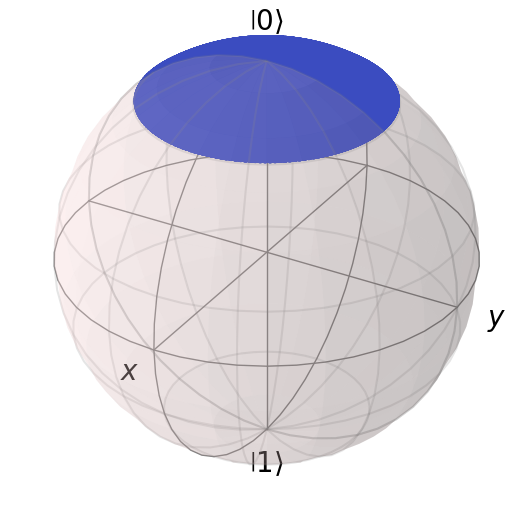

In [14]:
# Set the number of samples when scanning over a range
all_actions_superimposed()